# Model Analysis of InceptionV3 Training on CPU

We're going to start by loading in our model from training that contains training on all of our layers.  Since we saved in the hdf5 format it means we'll see the entire structure of the model  and won't have to reinstaniate it before using it.


In [2]:
from keras.models import load_model
model = load_model('inception_layers.iv3.hdf5')

As in the training we can utilize a data generator to pass our test data set easily by just pointing at a directory.  We'll pass in the test data set directory, set the target size to 299x299 and add a batch size of 32.  One important thing to note is that need for setting shuffle to False, since when we analysis our data at the end we prefer to have it in order since we can easily pass it into our evaluation and graphing functions.


In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input
#Test DataSet Generator with Augmentation
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_flow = test_generator.flow_from_directory(
    'Process_Data/test',
    shuffle=False,
    target_size=(299, 299),
    batch_size = 32
)

Found 66 images belonging to 5 classes.


Here we use the **predict_generator** and pass in our test data set generator.  This will generate predictions from the input samples of the data generator which we will pass in to our analysis functions.  We also want to get the correct classes from the generator so we'll store them in the variable true_classes for easy access to them later. 


In [4]:
import math
import numpy as np
predictions = model.predict_generator(
    test_flow,
    verbose=1,
    steps=math.ceil(test_flow.samples/test_flow.batch_size))
predicted_classes = np.argmax(predictions, axis=1) 

true_classes = test_flow.classes
class_labels = list(test_flow.class_indices.keys())  

Instructions for updating:
Please use Model.predict, which supports generators.
3/3 [==============================] - 4s 1s/step


0 : Class 0
1 : Class 1
2 : Class 2
3 : Class 3
4 : Class 4


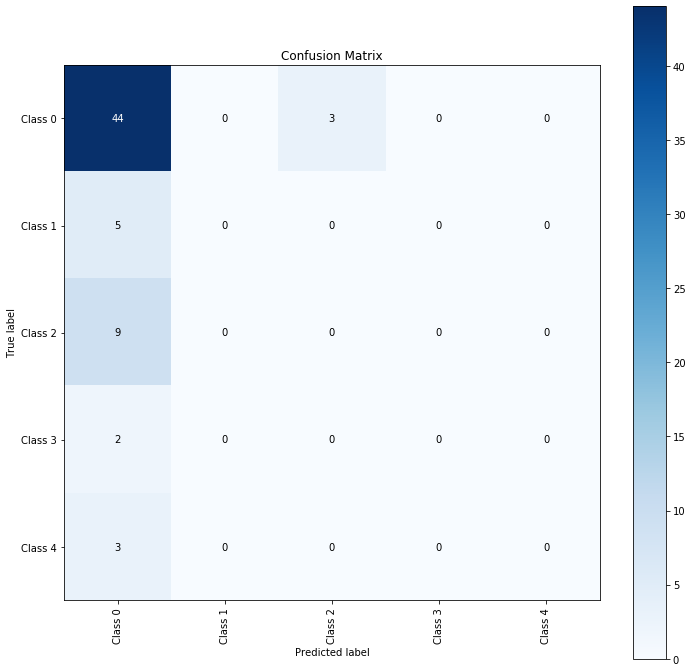

In [5]:
#%pip install scikit-plot

import matplotlib.pyplot as plt
%matplotlib inline  
import scikitplot as skplt

[print(k, ":", v) for k,v in enumerate(class_labels)]
true_map_classes = [class_labels[x] for x in true_classes]
predicted_map_classes = [class_labels[x] for x in predicted_classes]

skplt.metrics.plot_confusion_matrix(
    true_map_classes, 
    predicted_map_classes,
    labels=class_labels,
    x_tick_rotation=90,
    figsize=(12,12))

In [6]:
from sklearn.metrics import classification_report
report = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels)
print(report)

              precision    recall  f1-score   support

     Class 0       0.70      0.94      0.80        47
     Class 1       0.00      0.00      0.00         5
     Class 2       0.00      0.00      0.00         9
     Class 3       0.00      0.00      0.00         2
     Class 4       0.00      0.00      0.00         3

    accuracy                           0.67        66
   macro avg       0.14      0.19      0.16        66
weighted avg       0.50      0.67      0.57        66



/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


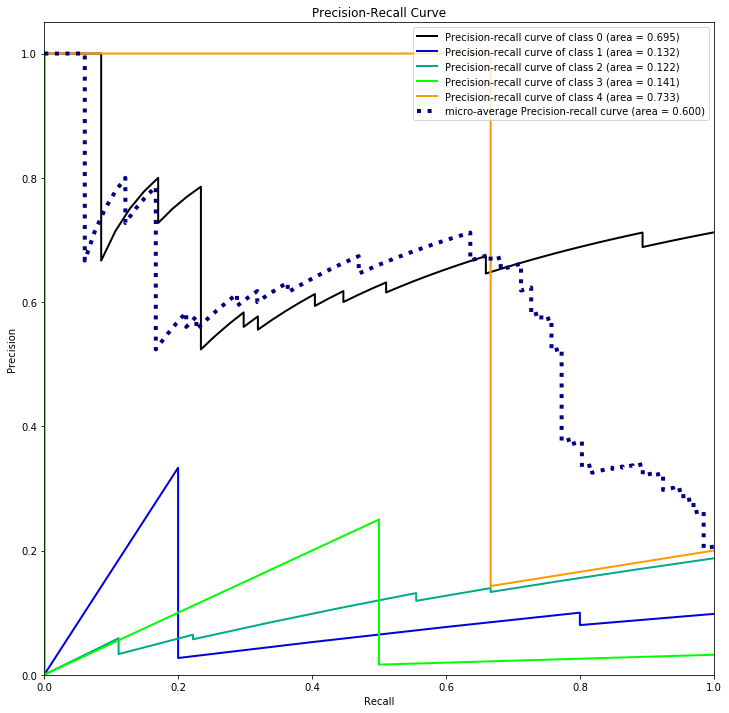

In [7]:
skplt.metrics.plot_precision_recall(
    true_classes,
    predictions,
    figsize=(12,12))

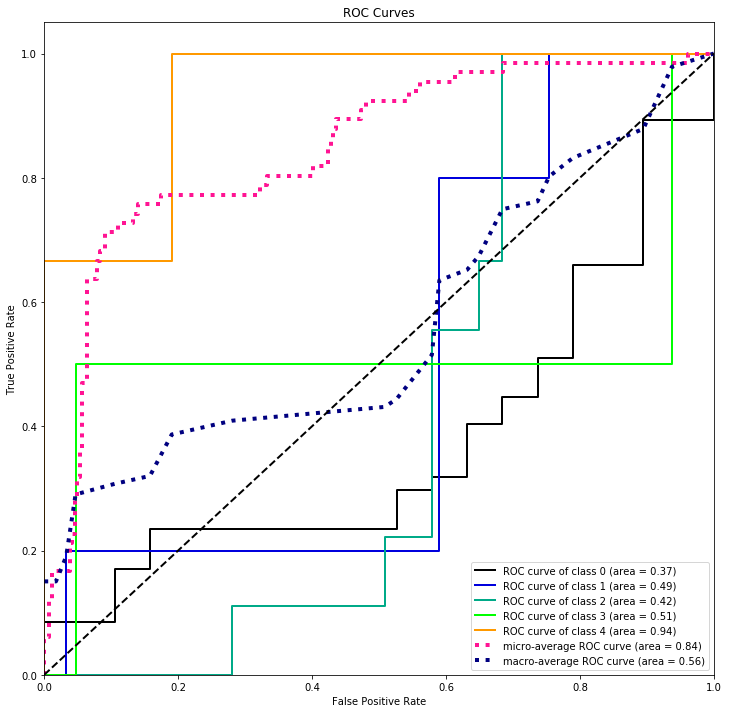

In [8]:
skplt.metrics.plot_roc(
    true_classes,
    predictions,
    figsize=(12,12))